# The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

- read data

In [72]:
import os
from pathlib import Path
import pandas as pd
import numpy as np

In [73]:
root = './'

- list directores in the root path

In [74]:
os.listdir(root)

['titanic-catboost.ipynb',
 'titanic.ipynb',
 'submission.csv',
 'titanic-xgb.ipynb',
 'catboost_info',
 '.ipynb_checkpoints',
 'input',
 'Training-titanic.ipynb',
 '.jovianrc']

In [75]:
root = Path("./input/")

- Display file in path(input)

In [76]:
os.listdir(root)

['test.csv', 'gender_submission.csv', 'train.csv']

- Impelement load function

In [6]:
def load_data(root, file_name):
    return pd.read_csv(root/file_name)

In [7]:
test = load_data(root, "test.csv")
train = load_data(root, "train.csv")
submission = load_data(root, "gender_submission.csv")

- Display train data

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

| Variable |	Definition |	Key |
	|----------- 	|--------- 	|---------- 	| 
| survival		| Survival		| 0 = No, 1 = Yes	| 
| pclass		| Ticket class		| 1 = 1st, 2 = 2nd, 3 = 3rd	| 
| sex		| Sex	| 		| 
| Age		| Age in years			| | 
| sibsp		| # of siblings / spouses aboard the Titanic	| 		| 
| parch		| # of parents / children aboard the Titanic		| 	| 
| ticket		| Ticket number		| 	| 
| fare		| Passenger fare		| 	| 
| cabin	| 	Cabin number		| 	| 
| embarked	| Port of Embarkation		| C = Cherbourg, Q = Queenstown, S = Southampton	| 

**Variable Notes**

pclass: A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

- Data Shapes

In [10]:
print("# of rows: {}\n# of columns: {}".format(*train.shape))

# of rows: 891
# of columns: 12


# Data Exploration

- Data types

In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Missing values

In [90]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
print(f"Cabin 'Train File' missing data precentage: {train.Cabin.isna().sum()/train.shape[0]:0.2f}%")
print(f"Cabin 'Test File' missing data precentage: {test.Cabin.isna().sum()/test.shape[0]:0.2f}%")

Cabin 'Train File' missing data precentage: 0.77%
Cabin 'Test File' missing data precentage: 0.78%


- Visualization

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


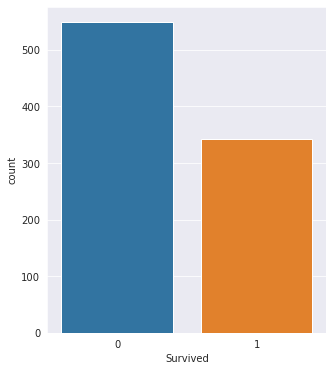

In [93]:
with sns.axes_style(style="darkgrid"):
    plt.figure(figsize=(5, 6))
    sns.countplot(data=train, x="Survived")


- Percentage of Survived

In [17]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

- Number of survived people in each sex 

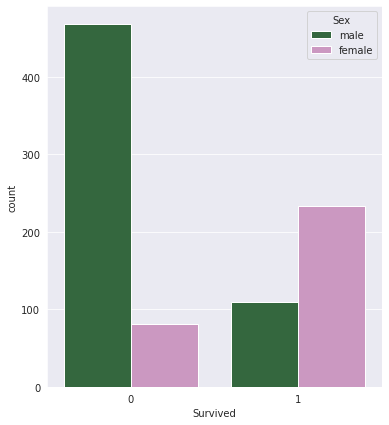

In [18]:
with sns.axes_style(style="darkgrid"):
    plt.figure(figsize=(6, 7))
    sns.countplot(data=train, x="Survived", hue="Sex", palette="cubehelix")


- Number of survived people in each Class

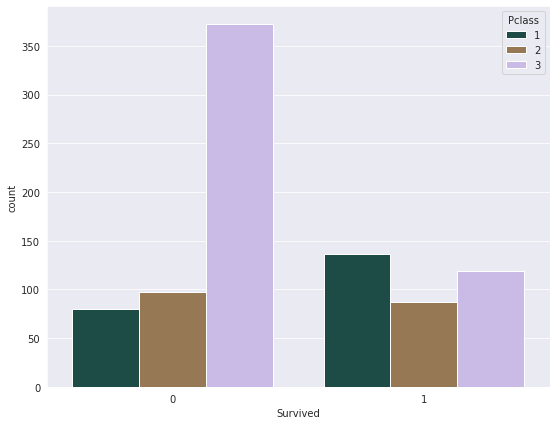

In [19]:
with sns.axes_style(style="darkgrid"):
    plt.figure(figsize=(9, 7))
    sns.countplot(data=train, x="Survived", hue="Pclass", palette="cubehelix")


- Age distribution

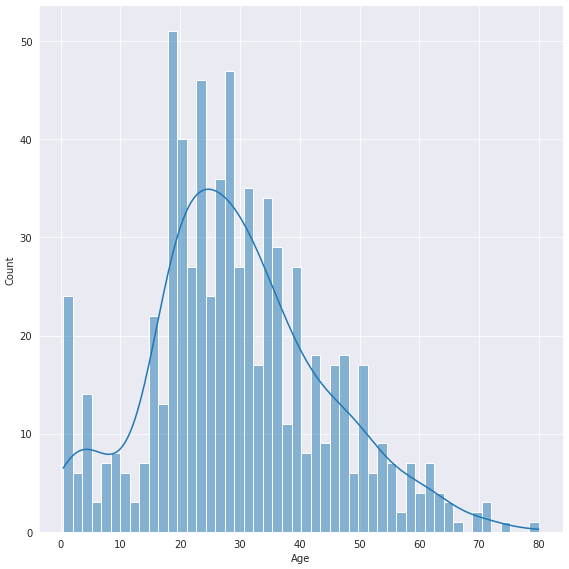

In [101]:
with sns.axes_style(style="darkgrid"):
    sns.displot(data=train, x="Age", bins=50, kde=True, height= 8)

- Age distribution, with survived

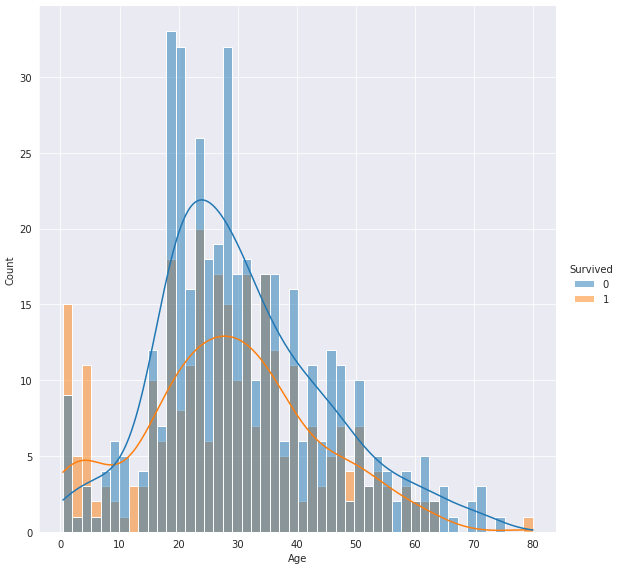

In [103]:
with sns.axes_style(style="darkgrid"):
    sns.displot(data=train, x="Age", hue="Survived", bins=50, kde=True, height= 8)


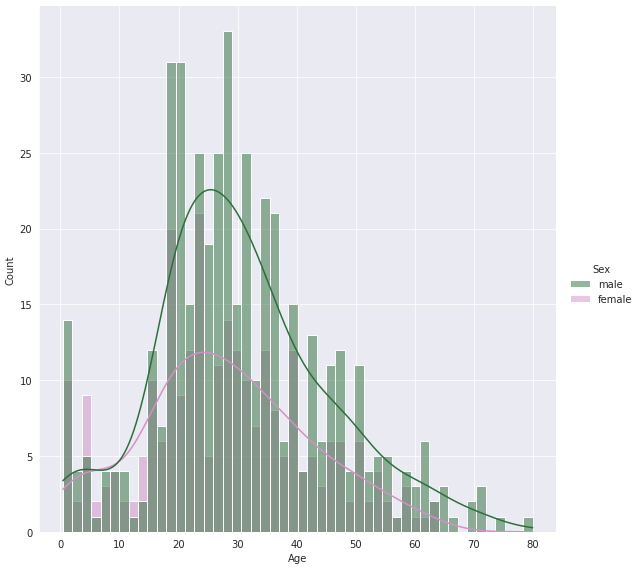

In [104]:
with sns.axes_style(style="darkgrid"):
    sns.displot(data=train, x="Age", hue="Sex", bins=50, kde=True, height= 8, palette="cubehelix")


- Column, Row = survived, sex

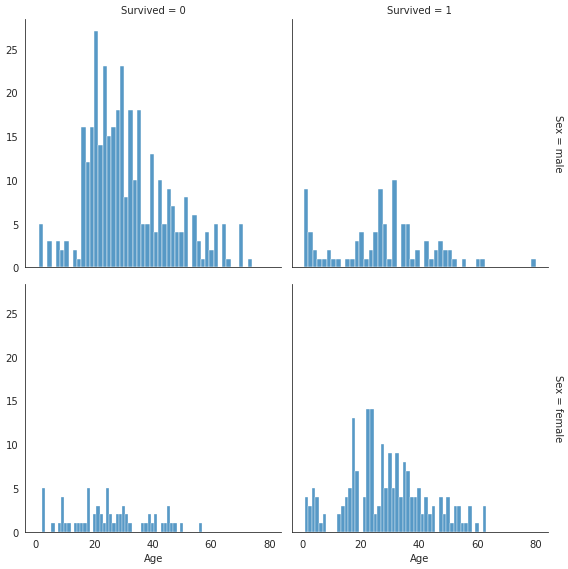

In [23]:
with sns.axes_style("white"):
    grid = sns.FacetGrid(data = train, row = "Sex", col = "Survived", 
                         margin_titles=True, height=4)
    grid.map(sns.histplot, "Age", bins=50);

- Column, Row = Pclass, survived

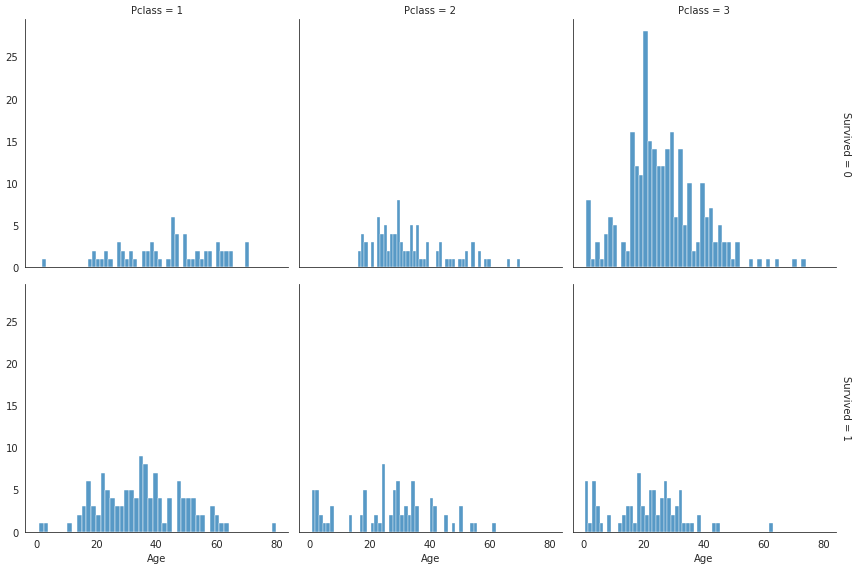

In [24]:
with sns.axes_style("white"):
    grid = sns.FacetGrid(data = train, row = "Survived", col = "Pclass", 
                         margin_titles=True, height=4)
    grid.map(sns.histplot, "Age", bins=50);

# Data Preprocessing

- Take a dataset copy

In [27]:
df_train = train.copy()
df_test = test.copy()

- Remove unimportant data

In [28]:
df_train.drop(columns = ["PassengerId", "Cabin", "Name", "Ticket"], axis=1, inplace=True)
df_test.drop(columns = ["PassengerId", "Cabin", "Name", "Ticket"], axis=1, inplace=True)

In [29]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


- Data description

In [113]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Implementing Pipeline

In [1]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attributes = attribute_names
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attributes].values

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [34]:
def full_preparation(categories, numerical):
    num_pipeline = Pipeline([    
        ("selector", DataFrameSelector(numerical)), # select numerical features
        ("num_imputer", SimpleImputer(strategy="mean")), # fill age missing values
        ("min_max_scaler", MinMaxScaler(feature_range=(0, 1))), # scale data into range 0, 1
    ])

    cat_pipeline = Pipeline([    
        ("selector", DataFrameSelector(categories)), # select categorical features
        ("cat_imputer", SimpleImputer(strategy="most_frequent")), # fill embarked missing values
        ("cat_encoder", OneHotEncoder(sparse=False, drop="first")), # encode categorical features
    ])

    # full process
    full_pipeline = FeatureUnion(transformer_list = [
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
    
    return full_pipeline

- Split dataset into **features, target**

In [35]:
features, target = df_train.drop("Survived", axis=1), df_train.Survived.to_numpy()

- Split features into **numerical, categorical** features

In [124]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [37]:
cats = ["Sex", "Embarked", "Pclass", "SibSp"]
nums = ["Age", "Fare", "Parch"]

- Preprocess train and test

In [38]:
prep = full_preparation(cats, nums)
# train on features
prepare = prep.fit(features)

In [39]:
# transform them
prep_train = prep.transform(features)
prep_test = prep.transform(df_test)

- After transformation

In [40]:
for l in prep_train[0:3]:
    print(list(l))

[0.2711736617240512, 0.014151057562208049, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.4722292033174164, 0.13913573538264068, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.32143754712239253, 0.015468569817999833, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [41]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


- Split data into train, test for modeling

In [4]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(prep_train, target, test_size=0.3, random_state = 42)

In [44]:
print("Train size: {}\nTest size: {}".format(len(x_train), len(x_test)))
print("Submission size:", len(prep_test))

Train size: 623
Test size: 268
Submission size: 418


# Build A Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

- Train linear model

In [46]:
lin_model = LogisticRegression(penalty="l2")

In [47]:
lin_model.fit(x_train, y_train)

LogisticRegression()

- Predict

In [48]:
y_hat = lin_model.predict(x_test)

- Accuracy

In [49]:
print("acc of logistic regression:", accuracy_score(y_test, y_hat))

acc of logistic regression: 0.7985074626865671


- Hyperparameter Tuning 

In [50]:
import numpy as np

params = {
    "penalty" : ["l1", "l2"],
    "C" : np.logspace(-4, 4, 20),
    "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

clf = GridSearchCV(LogisticRegression(), param_grid=params, cv=4, verbose=True, n_jobs=-1)

In [51]:
clf.fit(x_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    2.6s finished


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [52]:
clf.best_estimator_

LogisticRegression(C=0.08858667904100823, solver='newton-cg')

In [53]:
log_reg = clf.best_estimator_
print("acc of linear model:", accuracy_score(y_test, log_reg.predict(x_test))) 

acc of linear model: 0.8022388059701493


- Classification report with visualization

![](https://secureservercdn.net/198.71.233.197/l87.de8.myftpupload.com/wp-content/uploads/2016/09/table-blog.png)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(y_test, log_reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       157
           1       0.85      0.64      0.73       111

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



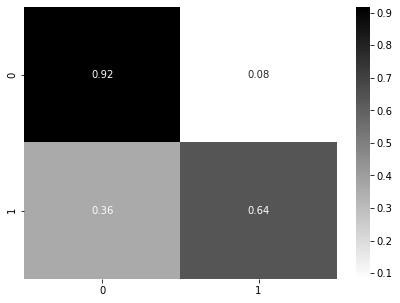

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
heatmap = sns.heatmap(
    data = confusion_matrix(y_test, log_reg.predict(x_test), normalize="true"), 
    annot = True, fmt = "0.2f", 
    cmap = "binary", ax = ax
)

plt.show()

# Build Popular Classification Models

- Import popular models

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

- Define all estimators

In [58]:
estimators = {
    "forest": RandomForestClassifier(),
    "knn": KNeighborsClassifier(),
    "svc": SVC()
}

- Create param grid

In [59]:
params = {
    
    "forest": {
        "n_estimators" : list(range(10, 401, 50)),
        "max_features" : ["auto", "sqrt"],
        "max_depth" : list(range(5, 101, 10))+[None],
        "min_samples_split" : [2, 5, 10],
        "min_samples_leaf" : [1, 2, 4],
        "bootstrap": [True, False],
    },
    
    "knn": {
        "n_neighbors": range(1,30),
        "leaf_size": range(1, 50),
        'p': [1, 2],
    },

    "svc": {
        'C': [0.1,1, 10, 100], 
        "gamma": [1,0.1,0.01,0.001],
        "kernel": ["rbf", "poly", "sigmoid"]
    }
}


- Apply grid searching

In [60]:
for name, estimator in estimators.items():
    # Create grid search object
    clf = GridSearchCV(estimator=estimator, param_grid=params[name], cv=5, verbose=True, n_jobs=-1)
    # Fit on data
    best_clf = clf.fit(x_train, y_train)
    estimators[name] = best_clf

Fitting 5 folds for each of 3168 candidates, totalling 15840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1816 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2466 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4066 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 5016 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 6066 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 7216 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 8466 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 9816 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 11266 tasks      |

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 14000 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 14195 out of 14210 | elapsed:   32.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 14210 out of 14210 | elapsed:   32.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.5s finished


- Display the report for each estimator

In [61]:
for name, estimator in estimators.items():
    y_hat = estimator.predict(x_test)
    print(name)
    print(classification_report(y_test, y_hat))

forest
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       157
           1       0.85      0.67      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268

knn
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       157
           1       0.85      0.60      0.71       111

    accuracy                           0.79       268
   macro avg       0.81      0.76      0.77       268
weighted avg       0.80      0.79      0.78       268

svc
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       157
           1       0.82      0.64      0.72       111

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



# Build A CatBoost Classification Model

- Import catboost model

In [62]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve

- Create param grid

In [63]:
params = {
    "depth": range(4, 10, 2),
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": range(1, 10, 2),
    "border_count": [4, 10],
}

- Apply grid searching

In [64]:
%%time

search = GridSearchCV(
    estimator=CatBoostClassifier(iterations=500), 
    param_grid=params, cv=5,
    verbose=True, 
    n_jobs=-1
).fit(x_train, y_train, eval_set=(x_test, y_test))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.1min finished


0:	learn: 0.6608215	test: 0.6598617	best: 0.6598617 (0)	total: 49.9ms	remaining: 24.9s
1:	learn: 0.6421700	test: 0.6427857	best: 0.6427857 (1)	total: 51.7ms	remaining: 12.9s
2:	learn: 0.6233076	test: 0.6240881	best: 0.6240881 (2)	total: 53.1ms	remaining: 8.8s
3:	learn: 0.6011822	test: 0.6021845	best: 0.6021845 (3)	total: 54.5ms	remaining: 6.76s
4:	learn: 0.5866061	test: 0.5879371	best: 0.5879371 (4)	total: 55.8ms	remaining: 5.53s
5:	learn: 0.5684147	test: 0.5708962	best: 0.5708962 (5)	total: 56.6ms	remaining: 4.66s
6:	learn: 0.5521433	test: 0.5552813	best: 0.5552813 (6)	total: 57.2ms	remaining: 4.03s
7:	learn: 0.5370320	test: 0.5418731	best: 0.5418731 (7)	total: 57.8ms	remaining: 3.56s
8:	learn: 0.5218493	test: 0.5273485	best: 0.5273485 (8)	total: 58.4ms	remaining: 3.18s
9:	learn: 0.5145391	test: 0.5208136	best: 0.5208136 (9)	total: 58.9ms	remaining: 2.89s
10:	learn: 0.5084971	test: 0.5153598	best: 0.5153598 (10)	total: 59.5ms	remaining: 2.64s
11:	learn: 0.5028052	test: 0.5091458	best:

265:	learn: 0.2996677	test: 0.4247261	best: 0.4192492 (183)	total: 227ms	remaining: 200ms
266:	learn: 0.2996346	test: 0.4247969	best: 0.4192492 (183)	total: 229ms	remaining: 199ms
267:	learn: 0.2992156	test: 0.4249782	best: 0.4192492 (183)	total: 230ms	remaining: 199ms
268:	learn: 0.2986100	test: 0.4245291	best: 0.4192492 (183)	total: 231ms	remaining: 198ms
269:	learn: 0.2981569	test: 0.4241788	best: 0.4192492 (183)	total: 232ms	remaining: 198ms
270:	learn: 0.2980132	test: 0.4240777	best: 0.4192492 (183)	total: 233ms	remaining: 197ms
271:	learn: 0.2977018	test: 0.4245742	best: 0.4192492 (183)	total: 235ms	remaining: 197ms
272:	learn: 0.2975479	test: 0.4243389	best: 0.4192492 (183)	total: 236ms	remaining: 196ms
273:	learn: 0.2972782	test: 0.4241916	best: 0.4192492 (183)	total: 237ms	remaining: 195ms
274:	learn: 0.2967267	test: 0.4237777	best: 0.4192492 (183)	total: 238ms	remaining: 195ms
275:	learn: 0.2960888	test: 0.4237740	best: 0.4192492 (183)	total: 239ms	remaining: 194ms
276:	learn

483:	learn: 0.2453501	test: 0.4503693	best: 0.4192492 (183)	total: 407ms	remaining: 13.5ms
484:	learn: 0.2450554	test: 0.4503948	best: 0.4192492 (183)	total: 408ms	remaining: 12.6ms
485:	learn: 0.2449552	test: 0.4504117	best: 0.4192492 (183)	total: 409ms	remaining: 11.8ms
486:	learn: 0.2448864	test: 0.4504352	best: 0.4192492 (183)	total: 410ms	remaining: 10.9ms
487:	learn: 0.2447103	test: 0.4503720	best: 0.4192492 (183)	total: 411ms	remaining: 10.1ms
488:	learn: 0.2446354	test: 0.4505668	best: 0.4192492 (183)	total: 412ms	remaining: 9.27ms
489:	learn: 0.2444333	test: 0.4507412	best: 0.4192492 (183)	total: 413ms	remaining: 8.43ms
490:	learn: 0.2442303	test: 0.4506380	best: 0.4192492 (183)	total: 415ms	remaining: 7.6ms
491:	learn: 0.2439901	test: 0.4512449	best: 0.4192492 (183)	total: 415ms	remaining: 6.75ms
492:	learn: 0.2437812	test: 0.4510762	best: 0.4192492 (183)	total: 417ms	remaining: 5.92ms
493:	learn: 0.2436770	test: 0.4509929	best: 0.4192492 (183)	total: 418ms	remaining: 5.07ms


In [65]:
search.best_params_

{'border_count': 10, 'depth': 4, 'l2_leaf_reg': 5, 'learning_rate': 0.05}

- Get best model

In [66]:
cat_model = search.best_estimator_

In [67]:
cat_model.best_score_

{'learn': {'Logloss': 0.24251392564246113},
 'validation': {'Logloss': 0.41924923437701067}}

- Display the report

In [68]:
y_hat = cat_model.predict(x_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.86      0.67      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



- Plot ROC curve

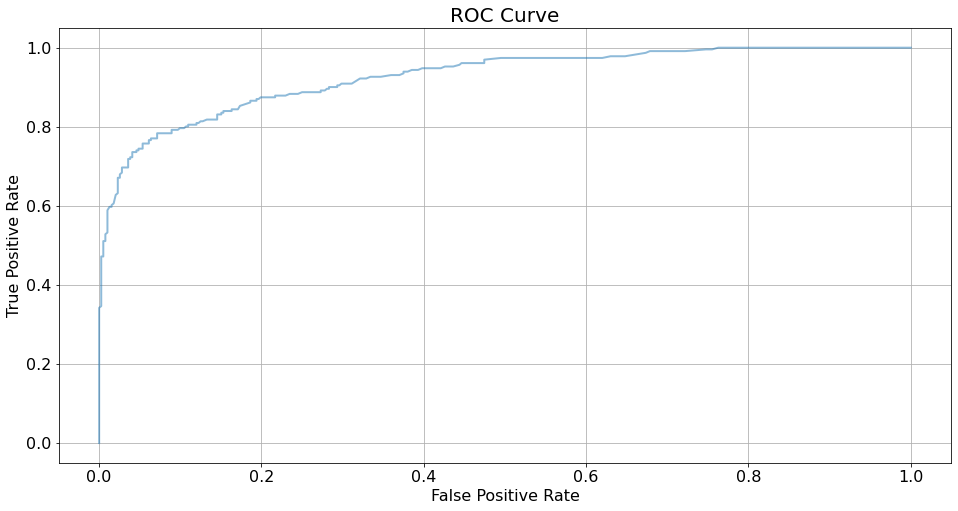

In [69]:
(fpr, tpr, thresholds) = get_roc_curve(model=cat_model, data=Pool(x_train, y_train), plot=True)

- Submite

In [70]:
predictions = list(log_reg.predict(prep_test))

output = pd.DataFrame({
    
    "PassengerId":test.PassengerId, 
    "Survived":predictions
})

output.to_csv("submission.csv", index = False)